In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#from warnings import catch_warnings
#from warnings import filterwarnings

In [4]:
#import datasets
#training data
sales = pd.read_csv('/Users/aga/Desktop/Pearson_Project/my_project_materials/sales_train.csv',header=None, sep=',')
sales.dtypes
#other info
items = pd.read_csv('/Users/aga/Desktop/Pearson_Project/my_project_materials/items.csv',header=None, sep=',')
item_categories = pd.read_csv('/Users/aga/Desktop/Pearson_Project/my_project_materials/item_categories.csv',header=None, sep=',')
shops = pd.read_csv('/Users/aga/Desktop/Pearson_Project/my_project_materials/shops.csv',header=None, sep=',')

/Users/aga/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
headers = sales.iloc[0]
sales  = pd.DataFrame(sales.values[1:], columns=headers)
# save updated dataset
sales.to_csv('sales_headers.csv')

In [6]:
iheaders = items.iloc[0]
items  = pd.DataFrame(items.values[1:], columns=iheaders)
# save updated dataset
items.to_csv('items_headers.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
#this file doesn't reveal any additional info
item_categories.head()
#item_categories['item_category_id'].isin(items['item_category_id']).value_counts() #True    84

,0,1
0,item_category_name,item_category_id
1,PC - Гарнитуры/Наушники,0
2,Аксессуары - PS2,1
3,Аксессуары - PS3,2
4,Аксессуары - PS4,3


In [8]:
#items.item_category_id.unique #69

In [9]:
#item_categories.item_category_id.unique #84 - so it's more than used in trainig set; must be considered during DF combining
items['item_id'].isin(sales['item_id']).value_counts() #False    13736 True      8434
sales['item_id'].isin(items['item_id']).value_counts() #False    2804778 True      131071

False    2804778
True      131071
Name: item_id, dtype: int64

In [10]:
sheaders = shops.iloc[0]
shops  = pd.DataFrame(shops.values[1:], columns=sheaders)
# save updated dataset
shops.to_csv('shops_headers.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
print(shops.shop_name.unique) #59
print(shops.shop_id.unique) #59

<bound method Series.unique of 0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаз

In [12]:
#keep=F marks all duplicates as true
shops.duplicated(subset='shop_name', keep=False).any()

False

In [13]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [15]:
from sklearn.preprocessing import LabelEncoder

city_encode = LabelEncoder()
shops["city_encoded"] = city_encode.fit_transform(shops["city"])


In [16]:
sales_shop=pd.merge(sales,shops[['shop_id','city_encoded']],on='shop_id',how='left')

In [17]:
sales['item_id'].isin(items['item_id']).value_counts()
#False    2804778
#True      131071

False    2804778
True      131071
Name: item_id, dtype: int64

In [18]:
sales_categorized = pd.merge(sales_shop,items[['item_id', 'item_category_id']],on='item_id',how='left')

In [19]:
sales_categorized.to_csv('sales_categorized.csv')
sales_categorized.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city_encoded,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,30.0,37
1,03.01.2013,0,25,2552,899.0,1.0,13.0,58
2,05.01.2013,0,25,2552,899.0,-1.0,13.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,13.0,58
4,15.01.2013,0,25,2555,1099.0,1.0,13.0,56


In [20]:
sales_sorted = sales_categorized.sort_values(by=['date'])
sales_sorted.reset_index(inplace=True)

In [21]:
sales_sorted['date']=pd.to_datetime(sales_categorized.date)


In [22]:
sales_sorted[['date_block_num','shop_id','item_id','item_price','item_cnt_day']] = sales_sorted[['date_block_num','shop_id','item_id','item_price','item_cnt_day']].apply(pd.to_numeric)

In [23]:
sales_sorted.dtypes

0
index                        int64
date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
city_encoded               float64
item_category_id            object
dtype: object

In [24]:
# save updated dataset
sales_sorted.to_csv=('sales_categorized_sorted.csv')

In [25]:
#price outlier filtering (after plotting the avg per item)
sales_sorted_pof = sales_sorted[sales_sorted.item_price <=100000]

In [26]:
mean_item_price = sales_sorted_pof.groupby(['item_id']).agg({'item_price':'mean'})
mean_item_price.columns = ['mean_item_price']
mean_item_price.reset_index(inplace=True)
mean_item_price.head()

,item_id,mean_item_price
0,0,58.0
1,1,4490.0
2,2,58.0
3,3,79.0
4,4,58.0


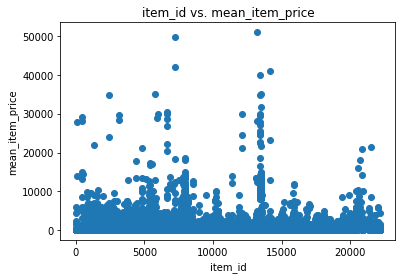

In [27]:
#mean_item_price_plot = plt.plot(mean_item_price) #the first version of plot (with outlier of ~60xValue) suggested that the outlier should be filtered out
x=mean_item_price['item_id']
y=mean_item_price['mean_item_price']
fig = plt.figure()
#nice 3d plot
#These are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot". Alternative form for add_subplot(111) is add_subplot(1, 1, 1)
#from mpl_toolkits.mplot3d import Axes3D
#ax = fig.add_subplot(111, projection='3d')
mean_item_price_plot=plt.scatter(x, y)
plt.title('item_id vs. mean_item_price')
plt.xlabel('item_id')
plt.ylabel('mean_item_price')
plt.show()

In [28]:
#add grouping by category
mean_category_price = sales_sorted_pof.groupby(['item_category_id']).agg({'item_category_id':'first','item_price':'mean'})
mean_category_price.columns = ['price_item_category_id','mean_category_price']
mean_category_price.reset_index(inplace=True)

In [29]:
#mean_category_price = mean_category_price.sort_values(by=mean_category_price['item_category_id'])
mean_category_price.head()

,item_category_id,price_item_category_id,mean_category_price
0,0,0,148.000000
1,1,1,148.000000
2,11,11,13560.151667
3,13,13,4912.634255
4,14,14,11345.060750


In [30]:
mean_category_price[['price_item_category_id','mean_category_price']]=mean_category_price[['price_item_category_id','mean_category_price']].apply(pd.to_numeric)

In [31]:
mean_category_price.sort_values(by='price_item_category_id',ascending=True)
mean_category_price.head()

,item_category_id,price_item_category_id,mean_category_price
0,0,0,148.000000
1,1,1,148.000000
2,11,11,13560.151667
3,13,13,4912.634255
4,14,14,11345.060750


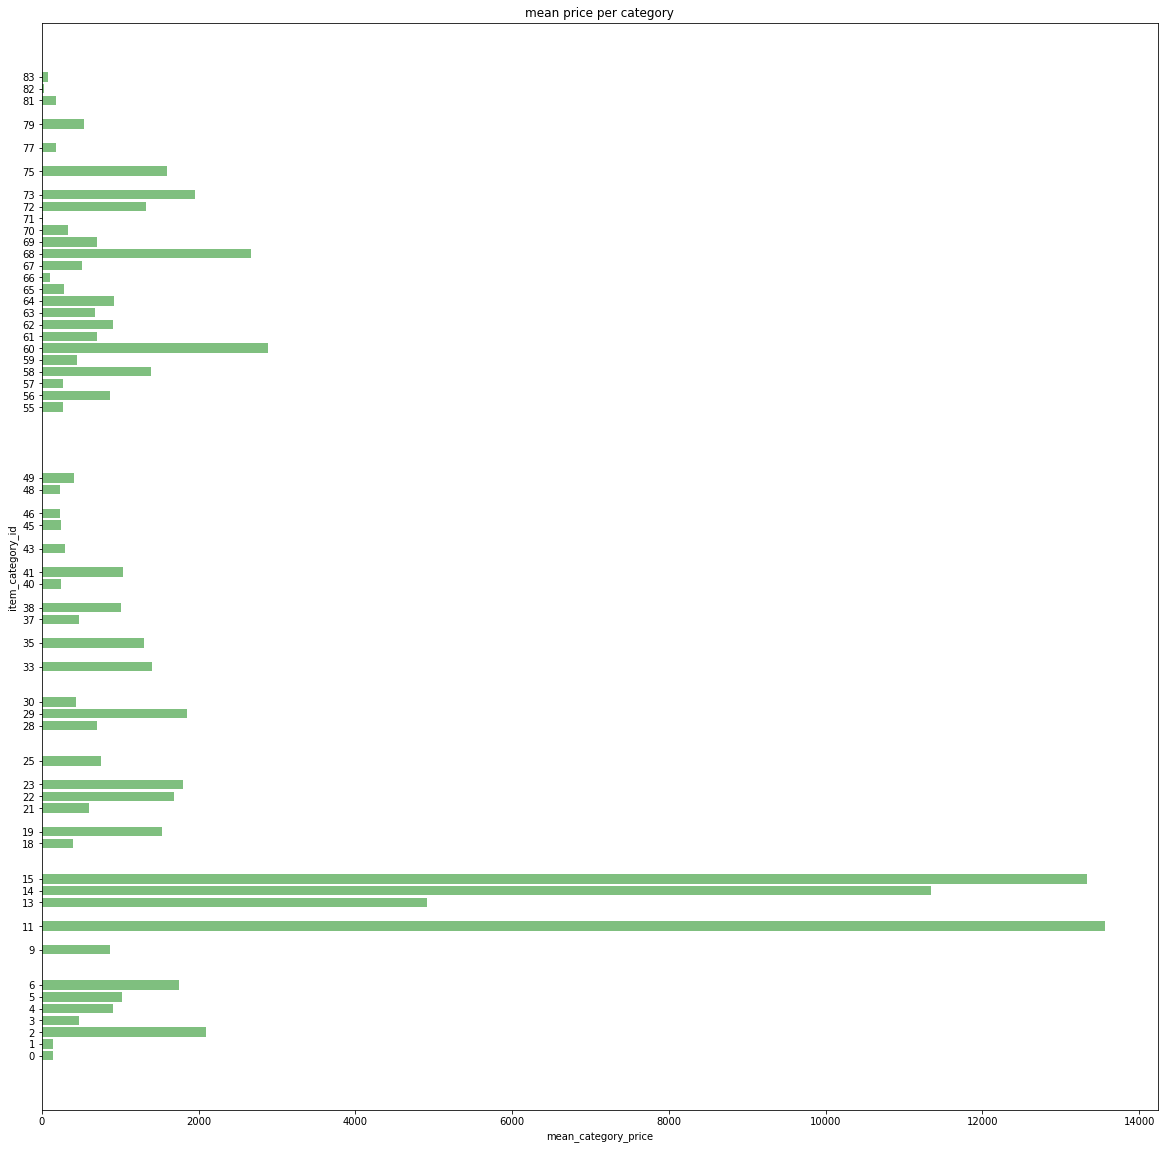

In [32]:
ici=mean_category_price['price_item_category_id']
mcp=mean_category_price['mean_category_price']
# Create horizontal bars
f, ax = plt.subplots(figsize=(20,20)) # set the size that you'd like (width, height)
price_cat_plot=plt.barh(ici,mcp,align='center',color='green',alpha=0.5) 
# Create names on the y-axis
plt.yticks(ici)
plt.title('mean price per category')
plt.xlabel('mean_category_price')
plt.ylabel('item_category_id')
# Show graphic
plt.show()

#CATEGORY 11,14,15 - particularly high values


In [33]:
#TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'
#solution:
sales_sorted.set_index('date', inplace=True)
# resample day data to total for each month for sales dataset
monthly_summary = pd.DataFrame()
# resample data to monthly
monthly_summary['item_M_price'] = sales_sorted.item_price.resample('M').mean()
monthly_summary['item_cnt_M'] = sales_sorted.item_cnt_day.resample('M').sum()
#monthly_data = monthly_grouped.sum()
# summarize
monthly_summary.head()
# save
#monthly_grouped.to_csv('sales_monthly_grouped_train_set.csv')

,item_M_price,item_cnt_M
date,,
2013-01-31,867.091246,123829.0
2013-02-28,851.155516,136853.0
2013-03-31,863.653489,141406.0
2013-04-30,871.365705,119642.0
2013-05-31,874.372391,116701.0


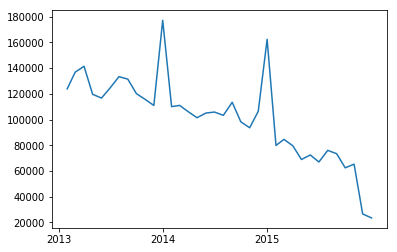

In [34]:
# plot - visual inspection of general tendencies in time
M_cnt = monthly_summary['item_cnt_M']
plt.plot(M_cnt)
#plt.xticks([])
plt.xticks(['2013', '2014', '2015'])
plt.show()

/Users/aga/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


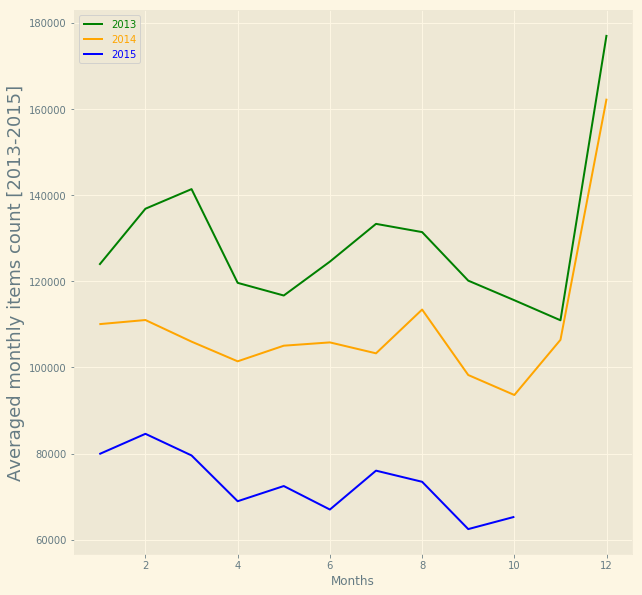

<Figure size 648x648 with 0 Axes>

In [35]:
#we can observe high peaks by the end of the year, let's see what happens there in a one-year scale
monthly_2013 = M_cnt.loc['2013-01-01':'2013-12-31']
monthly_2014 = M_cnt.loc['2014-01-01':'2014-12-31']
monthly_2015 = M_cnt.loc['2015-01-01':'2015-10-31']

import matplotlib.dates as mdates
#month = mdates.MonthLocator()  # I want to add monthly xticks
#ax.xaxis.set_minor_locator(month)
#ValueError: x and y must have same first dimension, but have shapes (1,) and (12,)
month=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#first panel
ax.plot(month,monthly_2013, color='g')
ax.plot(month,monthly_2014, color='orange')

#ax.legend(loc='best')
plt.xlabel('Months')
plt.ylabel('Averaged monthly items count [2013-2015]',fontsize=18)

fig2 = plt.figure(figsize=(9,9))
ax2 = fig.add_subplot(1,1,1)
#second panel (due to a shorter axis)
month15=[1,2,3,4,5,6,7,8,9,10]
ax2.plot(month15,monthly_2015, color='b')

# change the font colors to match the line colors (original text for this style was white):
leg2 = ax2.legend(loc='best')
for line,text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())
leg2.get_texts()[0].set_text('2013')
leg2.get_texts()[1].set_text('2014')
leg2.get_texts()[2].set_text('2015')

plt.show()

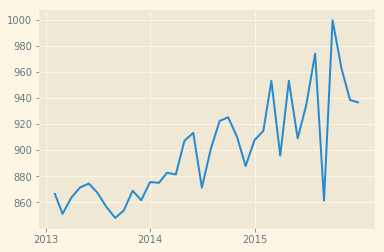

In [36]:
# plot
M_price = monthly_summary['item_M_price']
plt.plot(M_price)
#plt.xticks([])
plt.xticks(['2013', '2014', '2015'])
plt.show()

/Users/aga/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


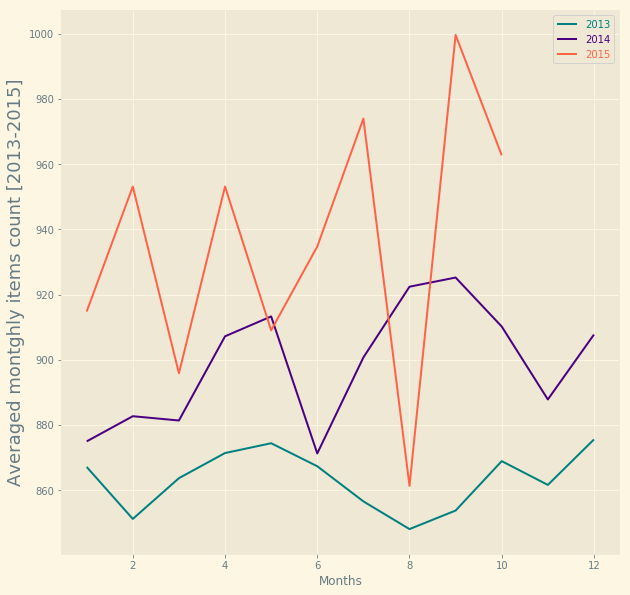

<Figure size 648x648 with 0 Axes>

In [37]:
#we can observe high peaks by the end of the year, let's see what happens there in a one-year scale
monthly_p_2013 = M_price.loc['2013-01-01':'2013-12-31']
monthly_p_2014 = M_price.loc['2014-01-01':'2014-12-31']
monthly_p_2015 = M_price.loc['2015-01-01':'2015-10-31']

import matplotlib.dates as mdates
#month = mdates.MonthLocator()  # I want to add monthly xticks
#ax.xaxis.set_minor_locator(month)
#ValueError: x and y must have same first dimension, but have shapes (1,) and (12,)
month=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#first panel
ax.plot(month,monthly_p_2013, color='teal')
ax.plot(month,monthly_p_2014, color='indigo')

#ax.legend(loc='best')
plt.xlabel('Months')
plt.ylabel('Averaged montghly items count [2013-2015]',fontsize=18)

fig2 = plt.figure(figsize=(9,9))
ax2 = fig.add_subplot(1,1,1)
#second panel (due to a shorter axis)
month15=[1,2,3,4,5,6,7,8,9,10]
ax2.plot(month15,monthly_p_2015, color='tomato')

# change the font colors to match the line colors (original text for this style was white):
leg2 = ax2.legend(loc='best')
for line,text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())
leg2.get_texts()[0].set_text('2013')
leg2.get_texts()[1].set_text('2014')
leg2.get_texts()[2].set_text('2015')

plt.show()

In [42]:
#selected variable from raw trainig set
selected_variables = sales[['date_block_num','shop_id','item_price','item_cnt_day']].apply(pd.to_numeric)
selected_variables.head()

,date_block_num,shop_id,item_price,item_cnt_day
0,0,59,999.00,1.0
1,0,25,899.00,1.0
2,0,25,899.00,-1.0
3,0,25,1709.05,1.0
4,0,25,1099.00,1.0


In [43]:
selected_variables.dtypes

0
date_block_num      int64
shop_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [44]:
selected_variables.isnull().sum()
#dropna()

0
date_block_num    0
shop_id           0
item_price        0
item_cnt_day      0
dtype: int64

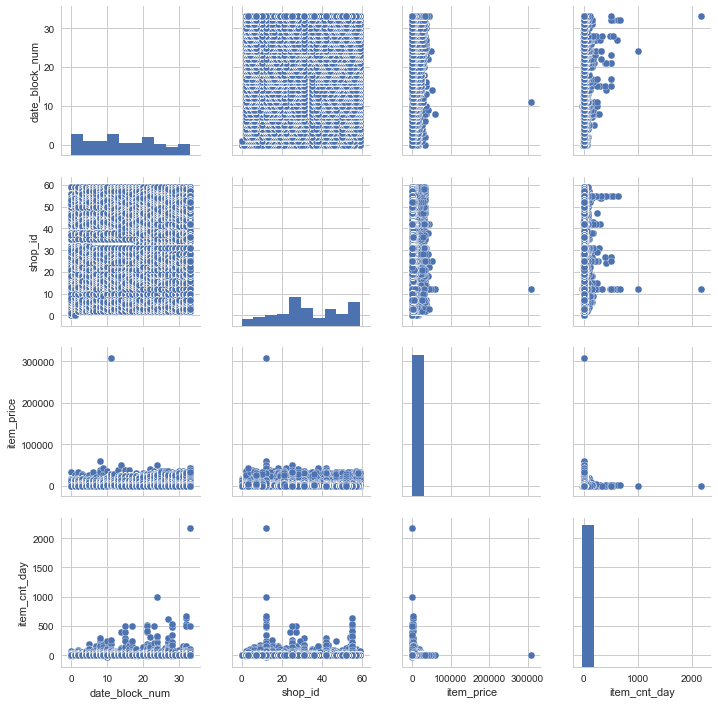

In [45]:
### visual exploration of relations between variables selected above (raw data)
sns.set(style='whitegrid', context='notebook')
sns.pairplot(selected_variables, size=2.5)
plt.show()

In [46]:
selected_grouped = sales[['date_block_num','item_id','shop_id','item_price','item_cnt_day']].apply(pd.to_numeric)
#based on a plots above, price above 100000 and cnt above 2000 should be removed as outliers
selected_grouped_pof = selected_grouped[(selected_grouped.item_price <=100000) | (selected_grouped.item_cnt_day > 2000)]

In [47]:
selected_grouped_price = selected_grouped_pof.groupby(['date_block_num','item_id']).agg({'item_price':'mean'})
selected_grouped_price.columns = ['mean_item_price']
selected_grouped_price.reset_index(inplace=True)
selected_grouped_price.head()

,date_block_num,item_id,mean_item_price
0,0,19,28.000000
1,0,27,2325.000000
2,0,28,549.000000
3,0,29,2397.500000
4,0,32,338.110349


In [48]:
selected_grouped_cnt = selected_grouped_pof.groupby(['date_block_num','item_id']).agg({'item_cnt_day':'sum'})
selected_grouped_cnt.columns = ['mean_item_cnt_M']
selected_grouped_cnt.reset_index(inplace=True)
selected_grouped_cnt.head()

,date_block_num,item_id,mean_item_cnt_M
0,0,19,1.0
1,0,27,7.0
2,0,28,8.0
3,0,29,4.0
4,0,32,299.0


In [50]:
mean_price_cnt=pd.merge(selected_grouped_price,selected_grouped_cnt[['item_id','mean_item_cnt_M']],on='item_id',how='left')
mean_price_cnt.head()

,date_block_num,item_id,mean_item_price,mean_item_cnt_M
0,0,19,28.0,1.0
1,0,27,2325.0,7.0
2,0,27,2325.0,3.0
3,0,27,2325.0,4.0
4,0,27,2325.0,1.0


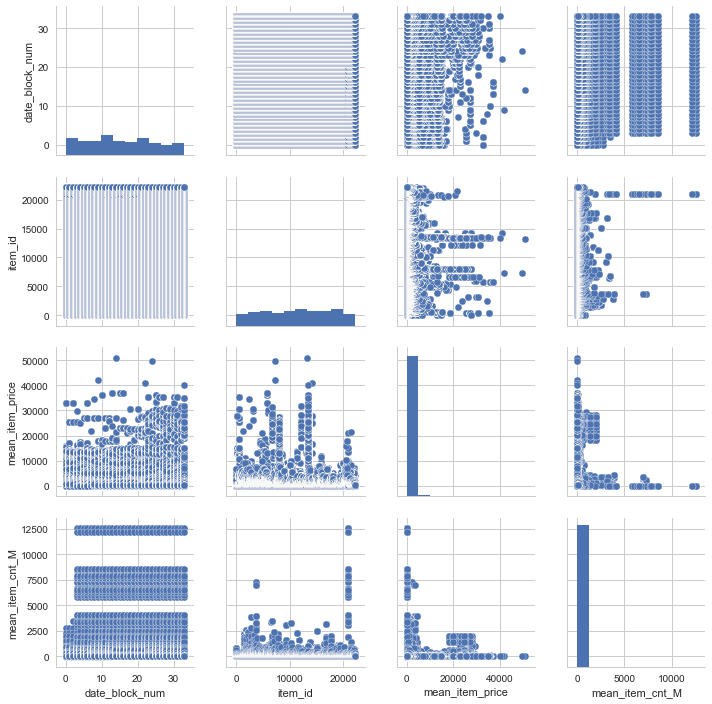

In [51]:
### visual exploration of relations between variables selected above
sns.set(style='whitegrid', context='notebook')
sns.pairplot(mean_price_cnt, size=2.5)
plt.show()

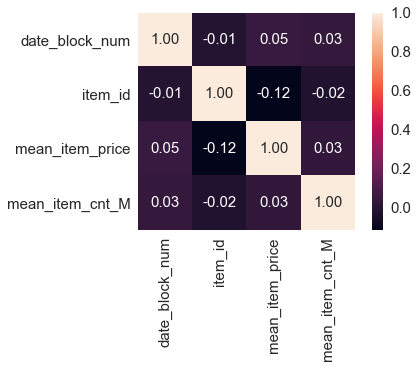

In [52]:
#corr coeff for those limited columns - just for additional visualisation to make sure that there are no correlations worth further investigation
cols = ['date_block_num','item_id','mean_item_price','mean_item_cnt_M']
cm = np.corrcoef(mean_price_cnt.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()
